In [60]:
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [30]:
data = pd.read_csv('project1.data')


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [32]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [33]:
data.shape

(398, 9)

In [34]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [81]:
data['horsepower'].unique()

array([130. , 165. , 150. , 140. , 198. , 220. , 215. , 225. , 190. ,
       170. , 160. ,  95. ,  97. ,  85. ,  88. ,  46. ,  87. ,  90. ,
       113. , 200. , 210. , 193. ,  93.5, 100. , 105. , 175. , 153. ,
       180. , 110. ,  72. ,  86. ,  70. ,  76. ,  65. ,  69. ,  60. ,
        80. ,  54. , 208. , 155. , 112. ,  92. , 145. , 137. , 158. ,
       167. ,  94. , 107. , 230. ,  49. ,  75. ,  91. , 122. ,  67. ,
        83. ,  78. ,  52. ,  61. ,  93. , 148. , 129. ,  96. ,  71. ,
        98. , 115. ,  53. ,  81. ,  79. , 120. , 152. , 102. , 108. ,
        68. ,  58. , 149. ,  89. ,  63. ,  48. ,  66. , 139. , 103. ,
       125. , 133. , 138. , 135. , 142. ,  77. ,  62. , 132. ,  84. ,
        64. ,  74. , 116. ,  82. ])

In [55]:
data.duplicated().sum()

0

In [36]:
# data['horsepower'].astype(float)
horsepower_avg = data[data['horsepower'] != '?']['horsepower'].astype(float).median()
horsepower_avg
data.loc[data['horsepower'] == '?',['horsepower']] = horsepower_avg

data['horsepower'] = data['horsepower'].astype(float)


<Axes: ylabel='acceleration'>

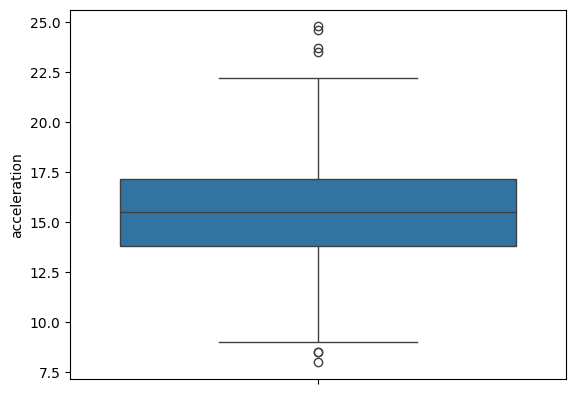

In [88]:
sns.boxplot(data['acceleration'])

In [79]:
data['origin'] = data['origin'].astype("category")
data = pd.get_dummies(data, columns=["origin"], drop_first=True)
data.info()


KeyError: 'origin'

In [73]:
keys = data.keys()
keys = keys.to_list()
keys.remove('car_name')
keys.remove('weight')
print(keys)

['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration', 'model_year', 'origin_2', 'origin_3']


In [74]:
for key in keys:
    print(key)
    for subkey in keys:
        if subkey is not key:
            plt.scatter(data[key], data[subkey], label=subkey)
    plt.xlabel(key)
    plt.legend()
    plt.savefig('figures/'+key+'_indep.png', bbox_inches='tight')
    plt.close()



mpg
cylinders
displacement
horsepower
acceleration
model_year
origin_2
origin_3


In [93]:
key = 'mpg'
subkeys = ['cylinders','displacement','horsepower']
for subkey in subkeys:
    plt.scatter(data[subkey], data[key], label=subkey)
    plt.xlabel(key)
    plt.legend()
    plt.savefig('figures/'+key+'_vs_ '+subkey+'.png', bbox_inches='tight')
    plt.close()

In [75]:
corr = data.drop(['car_name'], axis=1).corr()
corr2 = corr[(abs(corr)>0.75)&(abs(corr)<1)].dropna(how='all', axis=1).dropna(how='all')

In [76]:
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_2,origin_3
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.373886,-0.433505
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.282877,-0.318972
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.204473,0.109144
model_year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,-0.024489,0.193101
origin_2,0.259022,-0.352861,-0.373886,-0.282877,-0.298843,0.204473,-0.024489,1.000000,-0.229895
origin_3,0.442174,-0.396479,-0.433505,-0.318972,-0.440817,0.109144,0.193101,-0.229895,1.000000


In [77]:
corr2

,mpg,cylinders,displacement,horsepower,weight
mpg,NaN,-0.775396,-0.804203,-0.773453,-0.831741
cylinders,-0.775396,NaN,0.950721,0.841284,0.896017
displacement,-0.804203,0.950721,NaN,0.895778,0.932824
horsepower,-0.773453,0.841284,0.895778,NaN,0.862442
weight,-0.831741,0.896017,0.932824,0.862442,NaN


<Axes: >

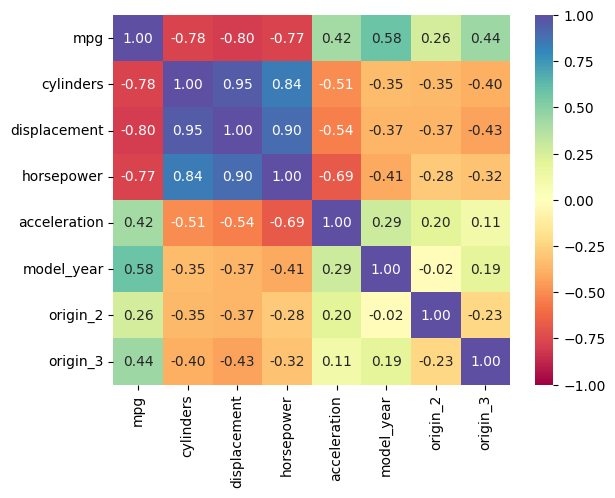

In [78]:
sns.heatmap(
   data[keys].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

In [110]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [142]:
# training the model
from sklearn.model_selection import train_test_split
training_data = data.drop(['car_name','model_year', 'weight', 'acceleration', 'origin_2', 'origin_3'], axis=1)
X = training_data.drop(['mpg'], axis=1)
Y = training_data['mpg']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [143]:
import sklearn.linear_model
lr = linear_model.LinearRegression()

lr.fit(X_train, Y_train)

LinearRegression()

In [144]:
lr.score(X_train, Y_train)

0.6465901258115792

In [145]:
lr.score(X_test, Y_test)


0.6995693629432663

In [146]:
lr.predict(X.iloc[0:10])

array([16.92605809, 13.22257813, 15.28362219, 15.77242386, 16.47144139,
        8.38801733,  6.13094201,  6.93433805,  5.78143325, 10.25303012])

In [147]:
Y[0:10]

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
5    15.0
6    14.0
7    14.0
8    14.0
9    15.0
Name: mpg, dtype: float64